# What is the Decision Trees .Please visit --> Report.Md -> Decision Tree

# pip install numpy pandas scikit-learn matplotlib
If you install requirement.txt  before ,not need to install again 

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, accuracy_score




In [14]:
#read data with modül of pandas 
df = pd.read_csv("C:\DataScience_FinalProject\data\heart.csv")

In [15]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [16]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [17]:
#split dataset in features and target variabl
feature_cols=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
        'exang', 'oldpeak', 'slope', 'ca', 'thal']
X = df[feature_cols]
y = df.target

In [18]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [19]:
# Create Decision Tree classifer object
clf =DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)




In [20]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)


# Evaluating the Model

Let's estimate how accurately the classifier or model can predict the type of cultivars.

Accuracy can be computed by comparing actual test set values and predicted values.

In [21]:
# Model Accuracy, how often is the classifier correct?
from sklearn import metrics


print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9902597402597403


Visualizing Decision Trees

Accuracy: 0.9902597402597403


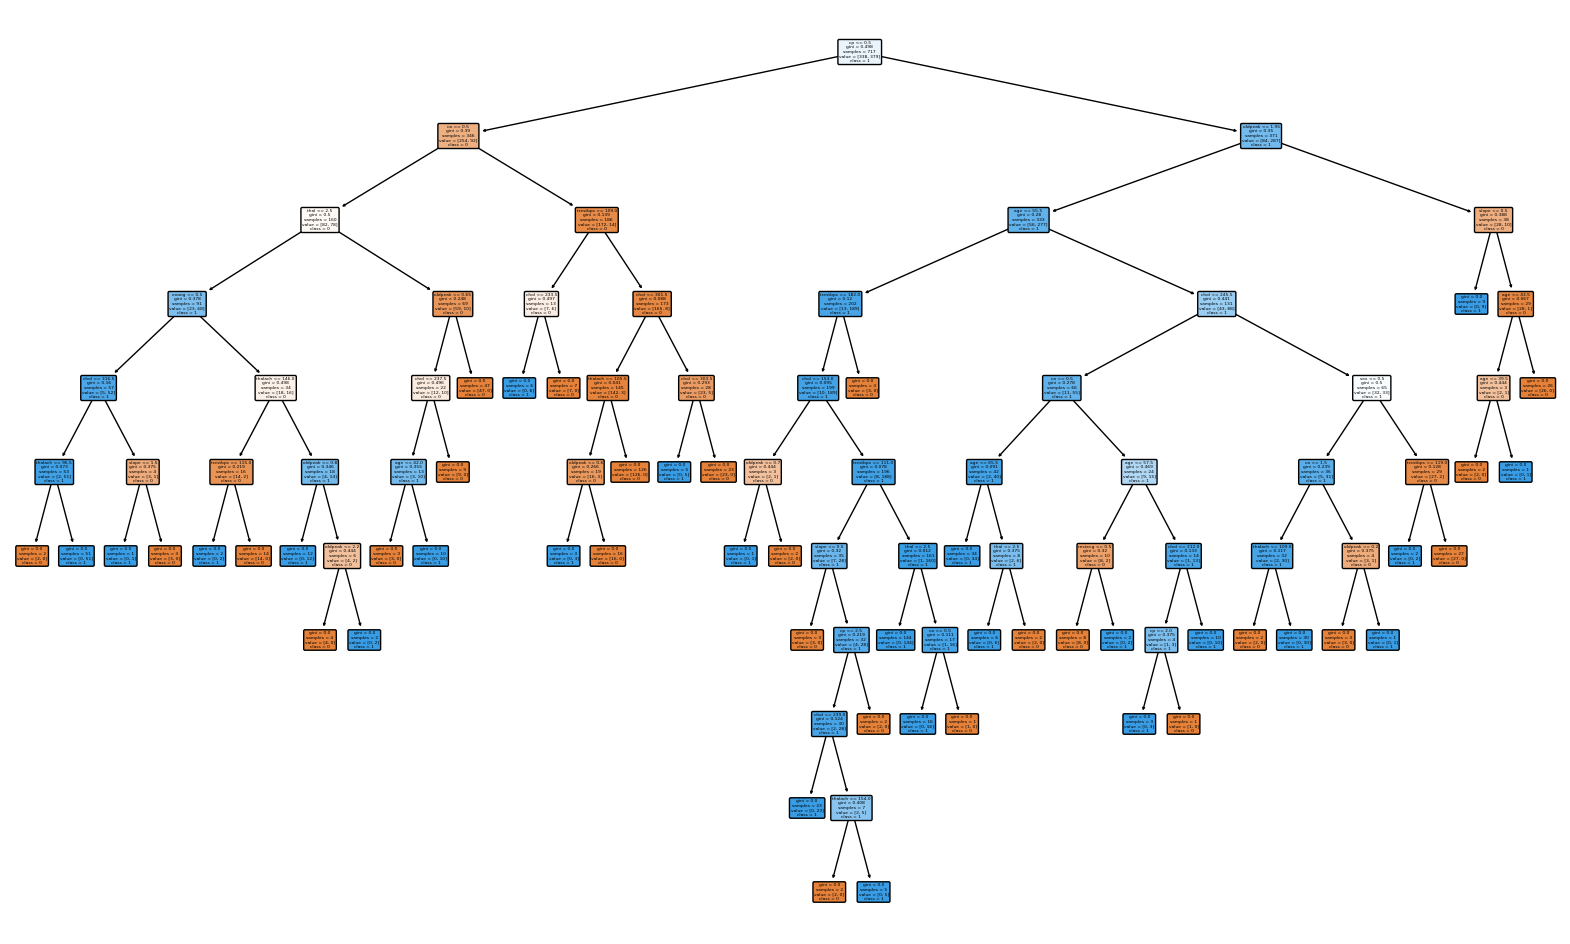

In [22]:
from sklearn.tree import plot_tree


print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

# Visualize the decision tree
plt.figure(figsize=(20, 12))
plot_tree(clf, feature_names=feature_cols, class_names=['0', '1'], filled=True, rounded=True)
plt.show()

In [23]:
st_df= pd.read_csv("C:\DataScience_FinalProject\data\heart.csv")

In [24]:
feature_cols=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
        'exang', 'oldpeak', 'slope', 'ca', 'thal']
X = st_df[feature_cols]
y = st_df.target

In [25]:
object = StandardScaler()


In [26]:
X_ST=object.fit_transform(X)


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_ST, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [28]:
# Create Decision Tree classifer object
clf =DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [29]:
from sklearn import metrics


print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9902597402597403


Confusion matrix, without normalization
[[161   0]
 [  3 144]]
Normalized confusion matrix
[[1.         0.        ]
 [0.02040816 0.97959184]]


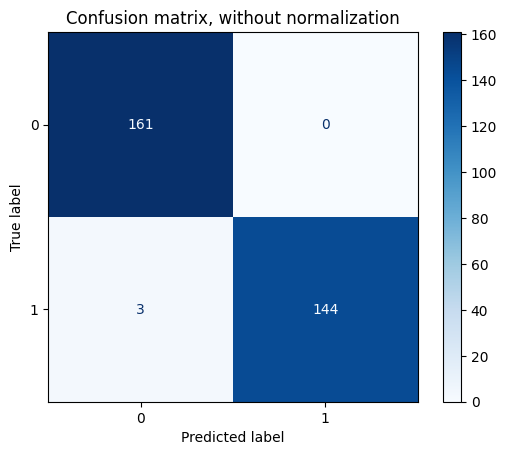

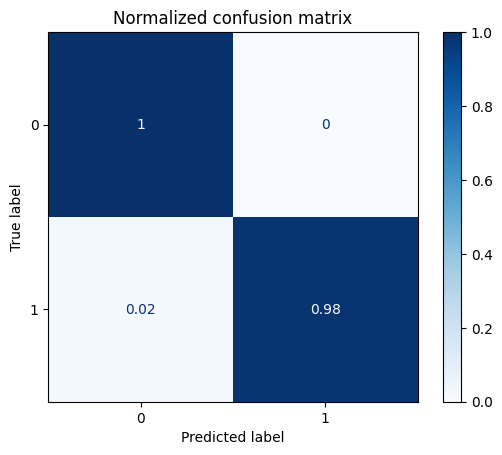

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_ST, y, test_size=0.3, random_state=1) # 70% training and 30% test
classifier=DecisionTreeClassifier().fit(X_train, y_train)



titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

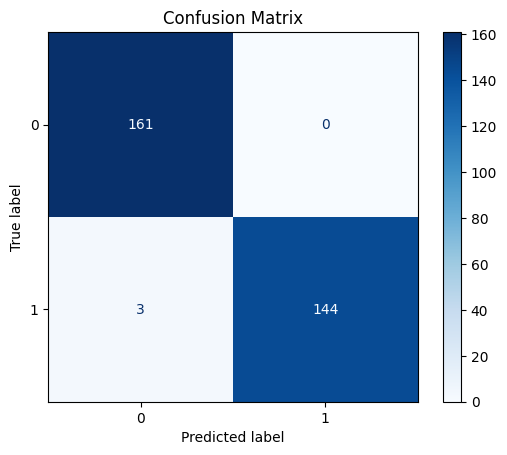

Precision: 0.9904
Recall: 0.9903
F1 Score: 0.9903
Accuracy: 0.9903


In [31]:
evalute_df= pd.read_csv("C:\DataScience_FinalProject\data\heart.csv")
feature_cols=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
        'exang', 'oldpeak', 'slope', 'ca', 'thal']
X = evalute_df[feature_cols]
y = evalute_df.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Decision Tree modelini oluşturmak ve eğitmek
classifier = DecisionTreeClassifier().fit(X_train, y_train)

# Confusion matrix hesaplama
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Confusion matrixi görselleştirmek
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot(cmap=plt.cm.Blues, values_format=".0f")
plt.title("Confusion Matrix")
plt.show()

# Performans metriklerini hesaplama
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

# Sonuçları ekrana yazdırma
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")
